In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import glob
import json
import pickle
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from matplotlib import lines
from astropy.io import fits
from astropy import stats
from astropy.table import Table

from lsst.eotest.sensor.MaskedCCD import MaskedCCD
from lsst.eotest.sensor.AmplifierGeometry import parse_geom_kwd
import lsst.eotest.sensor as sensorTest
import lsst.eotest.image_utils as imutils

from myutils import getccdid,get_goodruns,get_rtmids,get_slots,get_cslots,get_slots_per_bay,get_rtmtype,get_ampseg,get_rtms,get_crtms, getbaytype
from myutils import getBOTacqlinks,getBOTimgfiles,getDBinfoBOT,getDBinfo,getEOInfo,getBOTEOInfo
from myutils import glob_files_run

In [2]:
dfDB_12630 = getDBinfoBOT(run='12630')
print(dfDB_12630.columns)

Index(['MAX_OBSERVED_SIGNAL', 'MAX_FRAC_DEV', 'ROW_MEAN_VAR_SLOPE',
       'PSF_SIGMA', 'GAIN_ERROR', 'GAIN', 'CTI_LOW_PARALLEL',
       'CTI_LOW_SERIAL_ERROR', 'CTI_LOW_SERIAL', 'CTI_HIGH_SERIAL_ERROR',
       'CTI_HIGH_PARALLEL', 'CTI_HIGH_SERIAL', 'CTI_LOW_PARALLEL_ERROR',
       'CTI_HIGH_PARALLEL_ERROR', 'PTC_A00', 'PTC_NOISE', 'PTC_GAIN',
       'PTC_A00_ERROR', 'PTC_TURNOFF', 'PTC_NOISE_ERROR', 'PTC_GAIN_ERROR',
       'DARK_CURRENT_MEDIAN', 'DARK_CURRENT_95CL', 'BRIGHT_COLUMNS',
       'BRIGHT_PIXELS', 'DARK_COLUMNS', 'DARK_PIXELS', 'TEARING_DETECTIONS',
       'DIVISADERO_MAX_DEV', 'BF_SLOPEY_ERR', 'BF_YCORR_ERR', 'BF_SLOPEX_ERR',
       'BF_MEAN', 'BF_SLOPEX', 'BF_SLOPEY', 'BF_XCORR_ERR', 'BF_XCORR',
       'BF_YCORR', 'TOTAL_NOISE', 'SYSTEM_NOISE', 'READ_NOISE', 'BAY', 'SLOT',
       'AMP', 'BAYTYPE'],
      dtype='object')


In [11]:
df_12630 = getBOTEOInfo(run="12630")
print(df_12630.columns)

Index(['AMP', 'GAIN', 'GAIN_ERROR', 'READ_NOISE', 'FULL_WELL', 'MAX_FRAC_DEV',
       'CTI_HIGH_SERIAL', 'CTI_HIGH_PARALLEL', 'CTI_LOW_SERIAL',
       'CTI_LOW_PARALLEL', 'DARK_CURRENT_95', 'NUM_BRIGHT_PIXELS', 'NUM_TRAPS',
       'PSF_SIGMA', 'PTC_GAIN', 'PTC_GAIN_ERROR', 'PTC_A00', 'PTC_A00_ERROR',
       'PTC_NOISE', 'PTC_NOISE_ERROR', 'PTC_TURNOFF', 'SYSTEM_NOISE',
       'TOTAL_NOISE', 'NUM_BRIGHT_COLUMNS', 'NUM_DARK_PIXELS',
       'NUM_DARK_COLUMNS', 'DARK_CURRENT_MEDIAN', 'MAX_OBSERVED_SIGNAL',
       'ROW_MEAN_VAR_SLOPE', 'BF_XCORR', 'BF_XCORR_ERR', 'BF_YCORR',
       'BF_YCORR_ERR', 'BF_MEAN', 'BF_SLOPEX', 'BF_SLOPEX_ERR', 'BF_SLOPEY',
       'BF_SLOPEY_ERR', 'CTI_HIGH_SERIAL_ERROR', 'CTI_HIGH_PARALLEL_ERROR',
       'CTI_LOW_SERIAL_ERROR', 'CTI_LOW_PARALLEL_ERROR', 'DC95_SHOT_NOISE',
       'BAYSLOT', 'BAY', 'SLOT', 'BAYTYPE'],
      dtype='object')


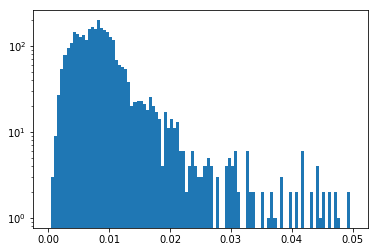

In [7]:
f,ax = plt.subplots()
h = ax.hist(dfDB_12630.DIVISADERO_MAX_DEV,bins=100,range=(0.0,0.05))
ax.set_yscale('log')

In [17]:
dfDB_12640 = getDBinfoBOT(run='12640')
print(dfDB_12640.columns)

Index(['MAX_OBSERVED_SIGNAL', 'MAX_FRAC_DEV', 'LINEARITY_TURNOFF',
       'ROW_MEAN_VAR_SLOPE', 'PSF_SIGMA', 'GAIN_ERROR', 'GAIN',
       'CTI_LOW_PARALLEL', 'CTI_LOW_SERIAL_ERROR', 'CTI_LOW_SERIAL',
       'CTI_HIGH_SERIAL_ERROR', 'CTI_HIGH_PARALLEL', 'CTI_HIGH_SERIAL',
       'CTI_LOW_PARALLEL_ERROR', 'CTI_HIGH_PARALLEL_ERROR', 'PTC_A00',
       'PTC_NOISE', 'PTC_GAIN', 'PTC_A00_ERROR', 'PTC_TURNOFF',
       'PTC_NOISE_ERROR', 'PTC_GAIN_ERROR', 'DARK_CURRENT_MEDIAN',
       'DARK_CURRENT_95CL', 'BRIGHT_COLUMNS', 'BRIGHT_PIXELS', 'DARK_COLUMNS',
       'DARK_PIXELS', 'TEARING_DETECTIONS', 'DIVISADERO_MAX_DEV',
       'BF_SLOPEY_ERR', 'BF_YCORR_ERR', 'BF_SLOPEX_ERR', 'BF_MEAN',
       'BF_SLOPEX', 'BF_SLOPEY', 'BF_XCORR_ERR', 'BF_XCORR', 'BF_YCORR',
       'TOTAL_NOISE', 'SYSTEM_NOISE', 'READ_NOISE', 'BAY', 'SLOT', 'AMP',
       'BAYTYPE'],
      dtype='object')


In [18]:
df_12640 = getBOTEOInfo(run="12640")
print(df_12640.columns)

Index(['AMP', 'GAIN', 'GAIN_ERROR', 'READ_NOISE', 'FULL_WELL', 'MAX_FRAC_DEV',
       'CTI_HIGH_SERIAL', 'CTI_HIGH_PARALLEL', 'CTI_LOW_SERIAL',
       'CTI_LOW_PARALLEL', 'DARK_CURRENT_95', 'NUM_BRIGHT_PIXELS', 'NUM_TRAPS',
       'PSF_SIGMA', 'PTC_GAIN', 'PTC_GAIN_ERROR', 'PTC_A00', 'PTC_A00_ERROR',
       'PTC_NOISE', 'PTC_NOISE_ERROR', 'PTC_TURNOFF', 'SYSTEM_NOISE',
       'TOTAL_NOISE', 'NUM_BRIGHT_COLUMNS', 'NUM_DARK_PIXELS',
       'NUM_DARK_COLUMNS', 'DARK_CURRENT_MEDIAN', 'MAX_OBSERVED_SIGNAL',
       'ROW_MEAN_VAR_SLOPE', 'BF_XCORR', 'BF_XCORR_ERR', 'BF_YCORR',
       'BF_YCORR_ERR', 'BF_MEAN', 'BF_SLOPEX', 'BF_SLOPEX_ERR', 'BF_SLOPEY',
       'BF_SLOPEY_ERR', 'CTI_HIGH_SERIAL_ERROR', 'CTI_HIGH_PARALLEL_ERROR',
       'CTI_LOW_SERIAL_ERROR', 'CTI_LOW_PARALLEL_ERROR', 'DC95_SHOT_NOISE',
       'BAYSLOT', 'BAY', 'SLOT', 'BAYTYPE'],
      dtype='object')


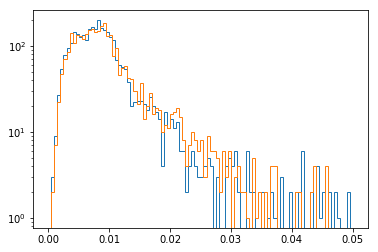

In [19]:
f,ax = plt.subplots()
h = ax.hist(dfDB_12630.DIVISADERO_MAX_DEV,bins=100,range=(0.0,0.05),histtype='step')
h = ax.hist(dfDB_12640.DIVISADERO_MAX_DEV,bins=100,range=(0.0,0.05),histtype='step')
ax.set_yscale('log')

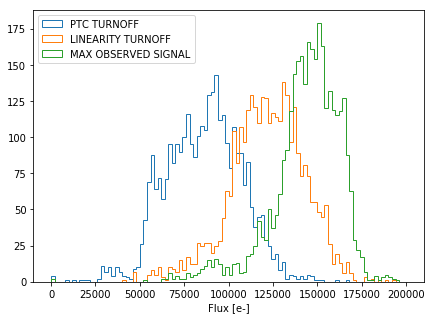

In [25]:
f,ax = plt.subplots(1,1,figsize=(7,5))
h = ax.hist(dfDB_12640.PTC_TURNOFF,bins=100,range=(0.0,2.e5),histtype='step',label='PTC TURNOFF')
h = ax.hist(dfDB_12640.LINEARITY_TURNOFF,bins=100,range=(0.0,2.e5),histtype='step',label='LINEARITY TURNOFF')
h = ax.hist(dfDB_12640.MAX_OBSERVED_SIGNAL,bins=100,range=(0.0,2.e5),histtype='step',label='MAX OBSERVED SIGNAL')
ax.set_xlabel('Flux [e-]')
ax.legend(loc=2)

In [5]:
run = '12630'
root_dir = '/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_archive/LCA-10134_Cryostat/LCA-10134_Cryostat-0001' 
all_results = glob_files_run(root_dir,run,'flat_pairs_BOT', 'v0', '*','R13_S11_*_det_response.fits')
print(all_results)

['/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_archive/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/12630/flat_pairs_BOT/v0/100366/R13_S11_12630_det_response.fits']


In [6]:
hdu = fits.open(all_results[0])
print(hdu[1].columns)
table = hdu[1].data

ColDefs(
    name = 'flux'; format = 'E'; unit = 'None'
    name = 'AMP01_SIGNAL'; format = 'E'; unit = 'e-'
    name = 'AMP02_SIGNAL'; format = 'E'; unit = 'e-'
    name = 'AMP03_SIGNAL'; format = 'E'; unit = 'e-'
    name = 'AMP04_SIGNAL'; format = 'E'; unit = 'ADU^2'
    name = 'AMP05_SIGNAL'; format = 'E'; unit = 'e-'
    name = 'AMP06_SIGNAL'; format = 'E'; unit = 'e-'
    name = 'AMP07_SIGNAL'; format = 'E'; unit = 'e-'
    name = 'AMP08_SIGNAL'; format = 'E'; unit = 'ADU^2'
    name = 'AMP09_SIGNAL'; format = 'E'; unit = 'e-'
    name = 'AMP10_SIGNAL'; format = 'E'; unit = 'e-'
    name = 'AMP11_SIGNAL'; format = 'E'; unit = 'e-'
    name = 'AMP12_SIGNAL'; format = 'E'; unit = 'ADU^2'
    name = 'AMP13_SIGNAL'; format = 'E'; unit = 'e-'
    name = 'AMP14_SIGNAL'; format = 'E'; unit = 'e-'
    name = 'AMP15_SIGNAL'; format = 'E'; unit = 'e-'
    name = 'AMP16_SIGNAL'; format = 'E'; unit = 'ADU^2'
    name = 'FLAT1_AMP01_SIGNAL'; format = 'E'; unit = 'e-'
    name = 'FLAT1_AMP02_S

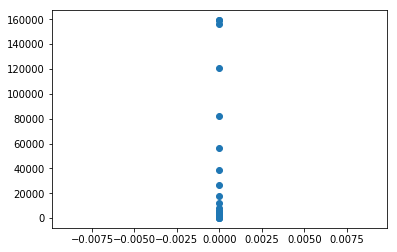

In [8]:
f,ax = plt.subplots(1,1)
ax.scatter(table['flux'],table['AMP01_SIGNAL'])

In [9]:
run = '12630'
root_dir = '/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_archive/LCA-10134_Cryostat/LCA-10134_Cryostat-0001' 
all_results = glob_files_run(root_dir,run,'ptc_BOT', 'v0', '*','R13_S11_*_ptc.fits')
print(all_results)

['/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_archive/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/12630/ptc_BOT/v0/100356/R13_S11_12630_ptc.fits']


In [10]:
hdu = fits.open(all_results[0])
print(hdu[1].columns)
table = hdu[1].data

ColDefs(
    name = 'EXPOSURE'; format = 'E'; unit = 'seconds'
    name = 'AMP01_MEAN'; format = 'E'; unit = 'ADU'
    name = 'AMP01_VAR'; format = 'E'; unit = 'ADU**2'
    name = 'AMP01_DISCARD'; format = 'J'; unit = 'pixls'
    name = 'AMP02_MEAN'; format = 'E'; unit = 'ADU'
    name = 'AMP02_VAR'; format = 'E'; unit = 'ADU**2'
    name = 'AMP02_DISCARD'; format = 'J'; unit = 'pixls'
    name = 'AMP03_MEAN'; format = 'E'; unit = 'ADU'
    name = 'AMP03_VAR'; format = 'E'; unit = 'ADU**2'
    name = 'AMP03_DISCARD'; format = 'J'; unit = 'pixls'
    name = 'AMP04_MEAN'; format = 'E'; unit = 'ADU'
    name = 'AMP04_VAR'; format = 'E'; unit = 'ADU**2'
    name = 'AMP04_DISCARD'; format = 'J'; unit = 'pixls'
    name = 'AMP05_MEAN'; format = 'E'; unit = 'ADU'
    name = 'AMP05_VAR'; format = 'E'; unit = 'ADU**2'
    name = 'AMP05_DISCARD'; format = 'J'; unit = 'pixls'
    name = 'AMP06_MEAN'; format = 'E'; unit = 'ADU'
    name = 'AMP06_VAR'; format = 'E'; unit = 'ADU**2'
    name = 'AMP0

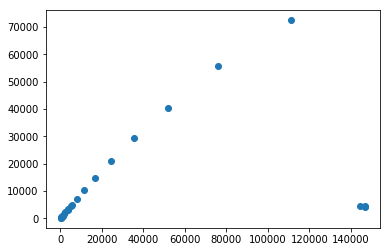

In [11]:
f,ax = plt.subplots(1,1)
ax.scatter(table['AMP01_MEAN'],table['AMP01_VAR'])

In [12]:
print(table['AMP01_DISCARD'])

[   0   32    5    8   25   15    6    0    8    4    0    0    0    0
   23    1 1970    3 1501    1    5    2    0]


In [13]:
run = '12630'
root_dir = '/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_archive/LCA-10134_Cryostat/LCA-10134_Cryostat-0001' 
all_results = glob_files_run(root_dir,run,'brighter_fatter_BOT', 'v0', '*','R13_S11_*_bf.fits')
print(all_results)
hdu = fits.open(all_results[0])
print(hdu[1].columns)
table = hdu[1].data

['/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_archive/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/12630/brighter_fatter_BOT/v0/100369/R13_S11_12630_bf.fits']
ColDefs(
    name = 'AMP01_COV10'; format = 'E'; unit = 'Unitless'
    name = 'AMP01_COV10_ERR'; format = 'E'; unit = 'Unitless'
    name = 'AMP01_COV20'; format = 'E'; unit = 'Unitless'
    name = 'AMP01_COV20_ERR'; format = 'E'; unit = 'Unitless'
    name = 'AMP01_COV01'; format = 'E'; unit = 'Unitless'
    name = 'AMP01_COV01_ERR'; format = 'E'; unit = 'Unitless'
    name = 'AMP01_COV02'; format = 'E'; unit = 'Unitless'
    name = 'AMP01_COV02_ERR'; format = 'E'; unit = 'Unitless'
    name = 'AMP01_COV11'; format = 'E'; unit = 'Unitless'
    name = 'AMP01_COV11_ERR'; format = 'E'; unit = 'Unitless'
    name = 'AMP01_MEAN'; format = 'E'; unit = 'e-'
    name = 'AMP02_COV10'; format = 'E'; unit = 'Unitless'
    name = 'AMP02_COV10_ERR'; format = 'E'; unit = 'Unitless'
    name = 'AMP02_COV20'; format = 'E'; unit = 'Unitless'
    name

In [14]:
run = '12630'
root_dir = '/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_archive/LCA-10134_Cryostat/LCA-10134_Cryostat-0001' 
all_results = glob_files_run(root_dir,run,'persistence_BOT', 'v0', '*','R13_S11_*_persistence_data.pickle')
print(all_results)
persistdict = pickle.load(open(all_results[0],'rb'))
pdf = pd.DataFrame(persistdict)
print(pdf.columns)

['/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_archive/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/12630/persistence_BOT/v0/100364/R13_S11_12630_persistence_data.pickle']
Index(['tseqnum', 'amp', 'mean_signal', 'stdev'], dtype='object')


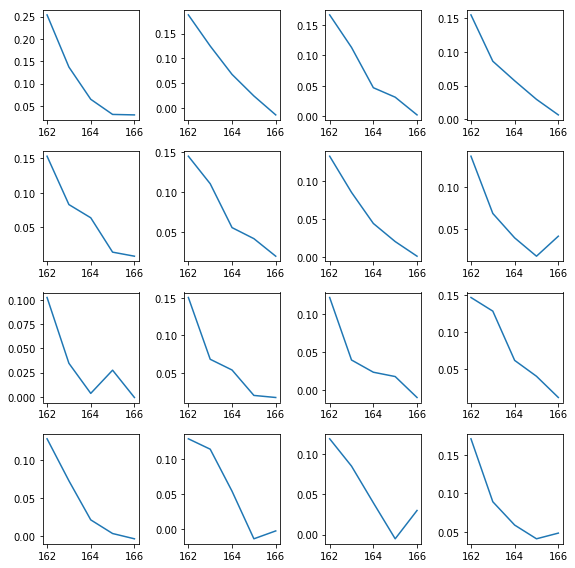

In [15]:
f,ax = plt.subplots(4,4,figsize=(8,8))
axf = ax.flatten()
for i in range(1,16+1):
    pdf1 = pdf[(pdf.amp==i)]
    axf[i-1].plot(pdf1.tseqnum,pdf1.mean_signal,)
    
f.tight_layout()

In [16]:
run = '12630'
root_dir = '/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_archive/LCA-10134_Cryostat/LCA-10134_Cryostat-0001' 
all_results = glob_files_run(root_dir,run,'bias_frame_BOT', 'v0', '*','R13_*_stats.pickle')
print(all_results)
biasdict = pickle.load(open(all_results[0],'rb'))
bdf = pd.DataFrame(biasdict)
print(bdf.columns)

['/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_archive/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/12630/bias_frame_BOT/v0/100353/R13_12630_bias_frame_stats.pickle']
Index(['raft', 'slot', 'tseqnum', 'TEMP1', 'TEMP2', 'TEMP3', 'TEMP4', 'TEMP5',
       'TEMP6', 'TEMP7', 'TEMP8', 'TEMP9', 'MJD', 'amp', 'mean', 'stdev'],
      dtype='object')


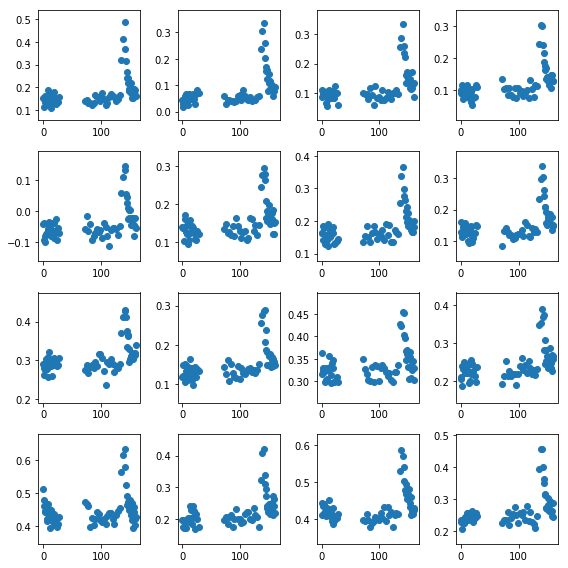

In [17]:
f,ax = plt.subplots(4,4,figsize=(8,8))
axf = ax.flatten()
for i in range(1,16+1):
    bdf1 = bdf[(bdf.slot=='S11') & (bdf.amp==i)]
    axf[i-1].scatter(bdf1.tseqnum,bdf1['mean'])
    
f.tight_layout()

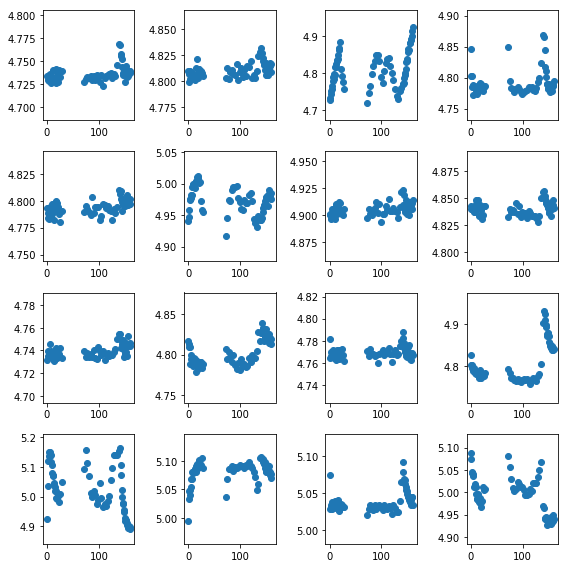

In [18]:
f,ax = plt.subplots(4,4,figsize=(8,8))
axf = ax.flatten()
for i in range(1,16+1):
    bdf1 = bdf[(bdf.slot=='S11') & (bdf.amp==i)]
    axf[i-1].scatter(bdf1.tseqnum,bdf1['stdev'])
    
f.tight_layout()

In [3]:
run = '12630'
root_dir = '/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage/LCA-10134_Cryostat/LCA-10134_Cryostat-0001' 
all_results = glob_files_run(root_dir,run,'tearing_BOT', 'v0', '*','R13_S11_*_stats.pkl')
print(all_results)
teardict = pickle.load(open(all_results[0],'rb'))
print(teardict)

['/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/12630/tearing_BOT/v0/100372/R13_S11_12630_tearing_stats.pkl']


In [6]:
run = '12630'
root_dir = '/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage/LCA-10134_Cryostat/LCA-10134_Cryostat-0001' 
all_results = glob_files_run(root_dir,run,'tearing_BOT', 'v0', '*','R13_*_max_divisidero.json')
print(all_results)
teardict = json.load(open(all_results[0],'r'))
print(teardict)


['/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/12630/tearing_BOT/v0/100372/R13_12630_max_divisidero.json']
{'S20': [0.00821608705638488, 0.00590853775699729, 0.010072478867626522, 0.008514116943505012, 0.05234369843911968, 0.0077994326038671735, 0.008204412064910072, 0.008552408723159544, 0.006557986406117267, 0.009690185450755173, 0.0069745396086072775, 0.0076164835644826345, 0.006444766995465145, 0.008381691046214446], 'S21': [0.011426412746383452, 0.010905547656665071, 0.011022362588702705, 0.00820436627606047, 0.008384559642328204, 0.008278435767535841, 0.009819160728911425, 0.009649451782151375, 0.008564388724644934, 0.007283575421074384, 0.009225435528818493, 0.030136426534914662, 0.007822697945026547, 0.00833775564088679], 'S22': [0.011630642158058868, 0.011267009800465244, 0.011152846347432965, 0.010599219041075525, 0.011611777449918481, 0.012264099769709103, 0.010009351891446916, 0.008248077653169372, 0.010869436345967043, 0.0073418

In [7]:
print(teardict['S11'])

[0.009019617271009528, 0.007414751886972271, 0.05123367843901683, 0.02462382302061472, 0.04159308687202057, 0.038342228931230626, 0.013974055041983457, 0.021300796423746382, 0.023507697186804455, 0.059365983755606755, 0.051822802032894466, 0.032735147896357786, 0.04171341735328926, 0.009094868825963442]
